# Explore here

In [35]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your code here
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

data.to_csv("data/raw/datos_seguro_medico.csv", index = False)
data.head()

OSError: Cannot save file into a non-existent directory: 'data\raw'

In [4]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No contiene valores perdidos y está formado por 3 variables categóricas y 4 numéricas

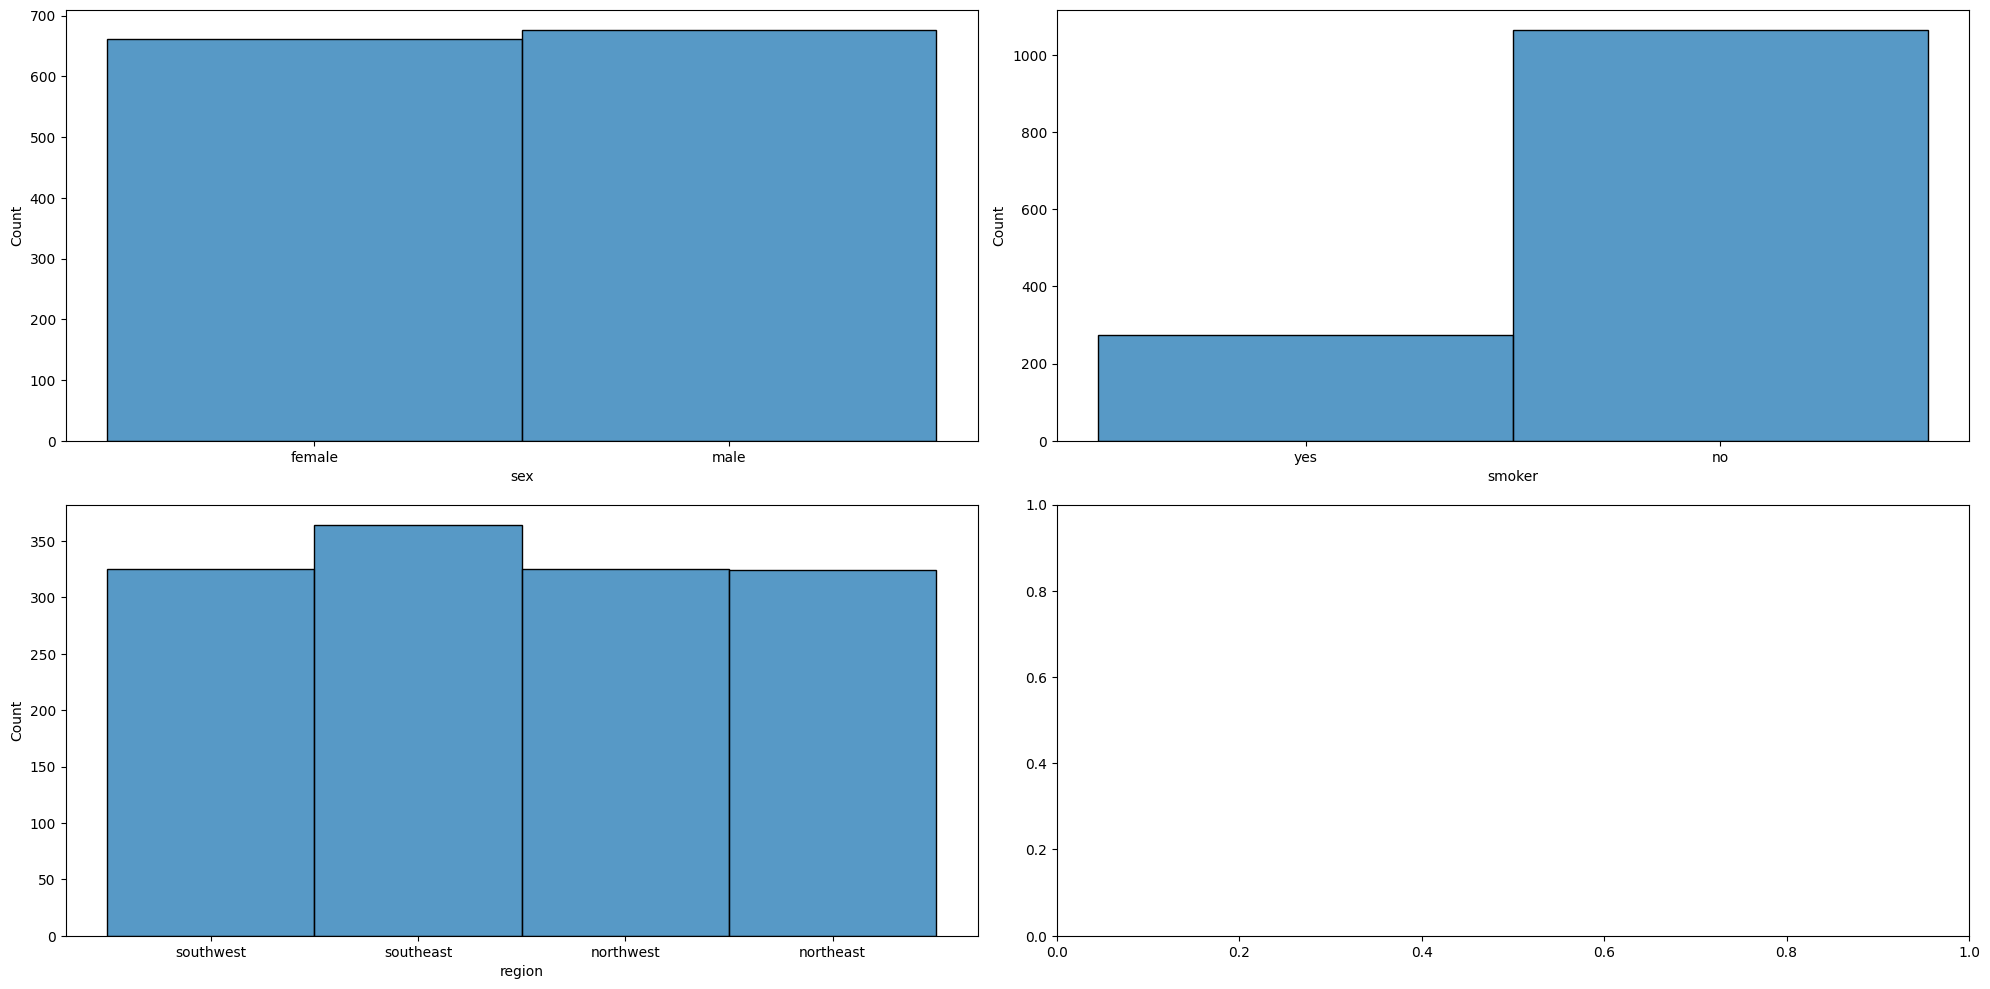

In [5]:
#Análisis univariable categorico

fig, axis = plt.subplots(2, 2, figsize=(20, 10))

# Creamos los histogramas
sns.histplot(ax = axis[0,0], data = data, x = "sex")
sns.histplot(ax = axis[0,1], data = data, x = "smoker")
sns.histplot(ax = axis[1,0], data = data, x = "region")


# Ajustamos el diseño para que no se superpongan
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Hay aproximadamente los mismos hombres que mujeres, en comparacion hay una gran cantidad de gente que no fuma frente a la que si

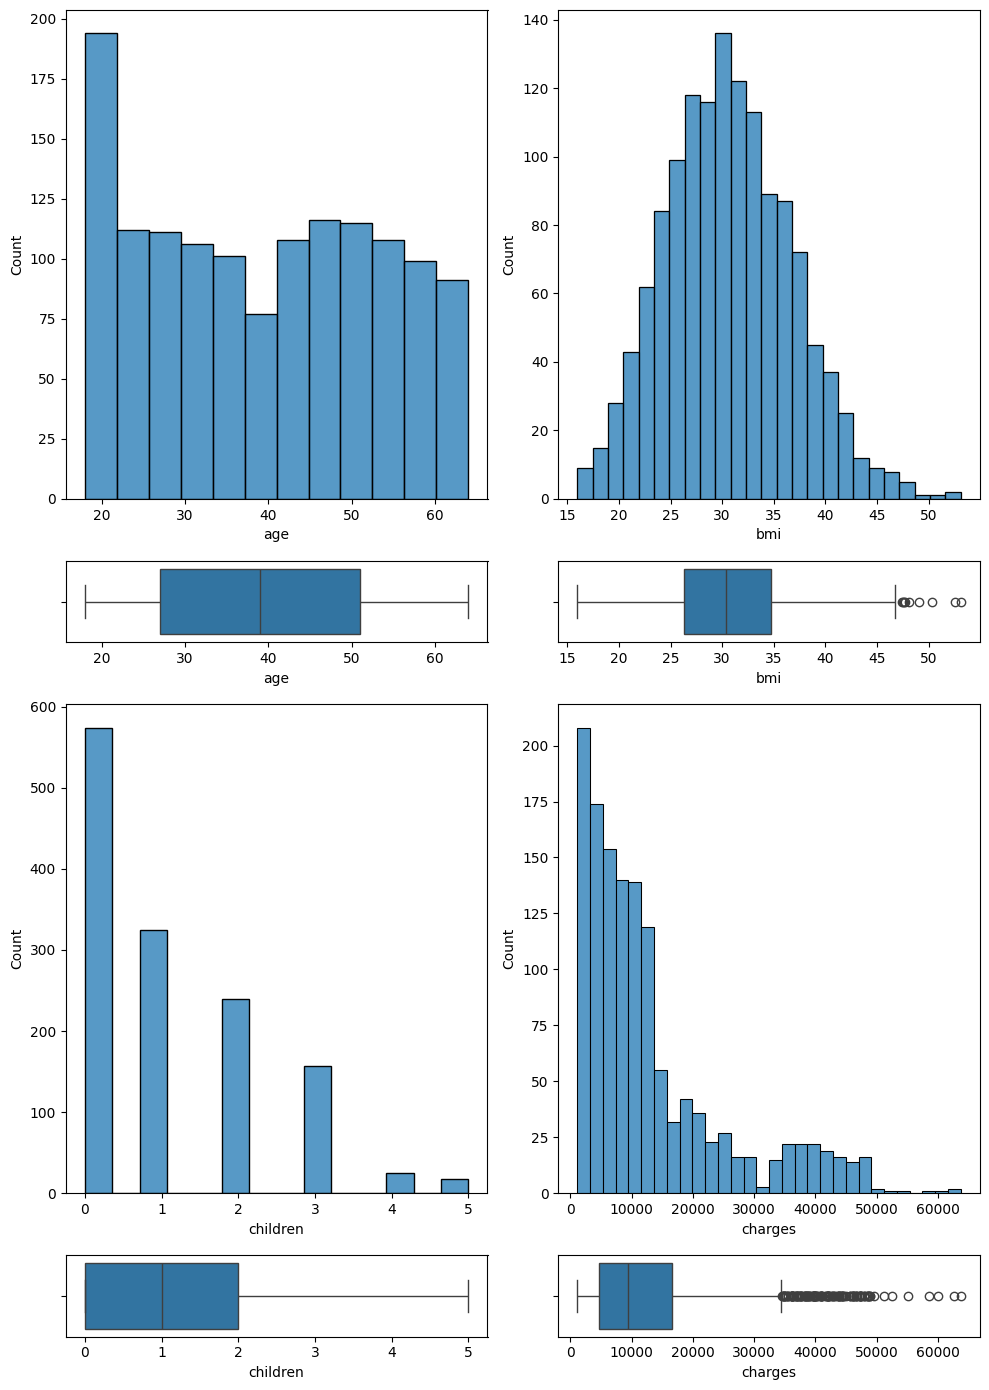

In [6]:
#Analisis univariable numerico 
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "age")
sns.boxplot(ax = axis[1, 0], data = data, x = "age")

sns.histplot(ax = axis[0, 1], data = data, x = "bmi")
sns.boxplot(ax = axis[1,1], data = data, x = "bmi")

sns.histplot(ax = axis[2, 0], data = data, x = "children")
sns.boxplot(ax = axis[3, 0], data = data, x = "children")

sns.histplot(ax = axis[2,1], data = data, x = "charges")
sns.boxplot(ax = axis[3, 1], data = data, x = "charges")

plt.tight_layout()

plt.show()

Predomina la gente de una edad aproximada de 20 años, la media es algo inferior a los 40 años y no tiene valores atípicos, el BMI sigue una distribucion normal con una pequeña cola a la derecha que corresponde a datos atípicos, la mayoría no tiene hijos y el rango está entre 0-5 

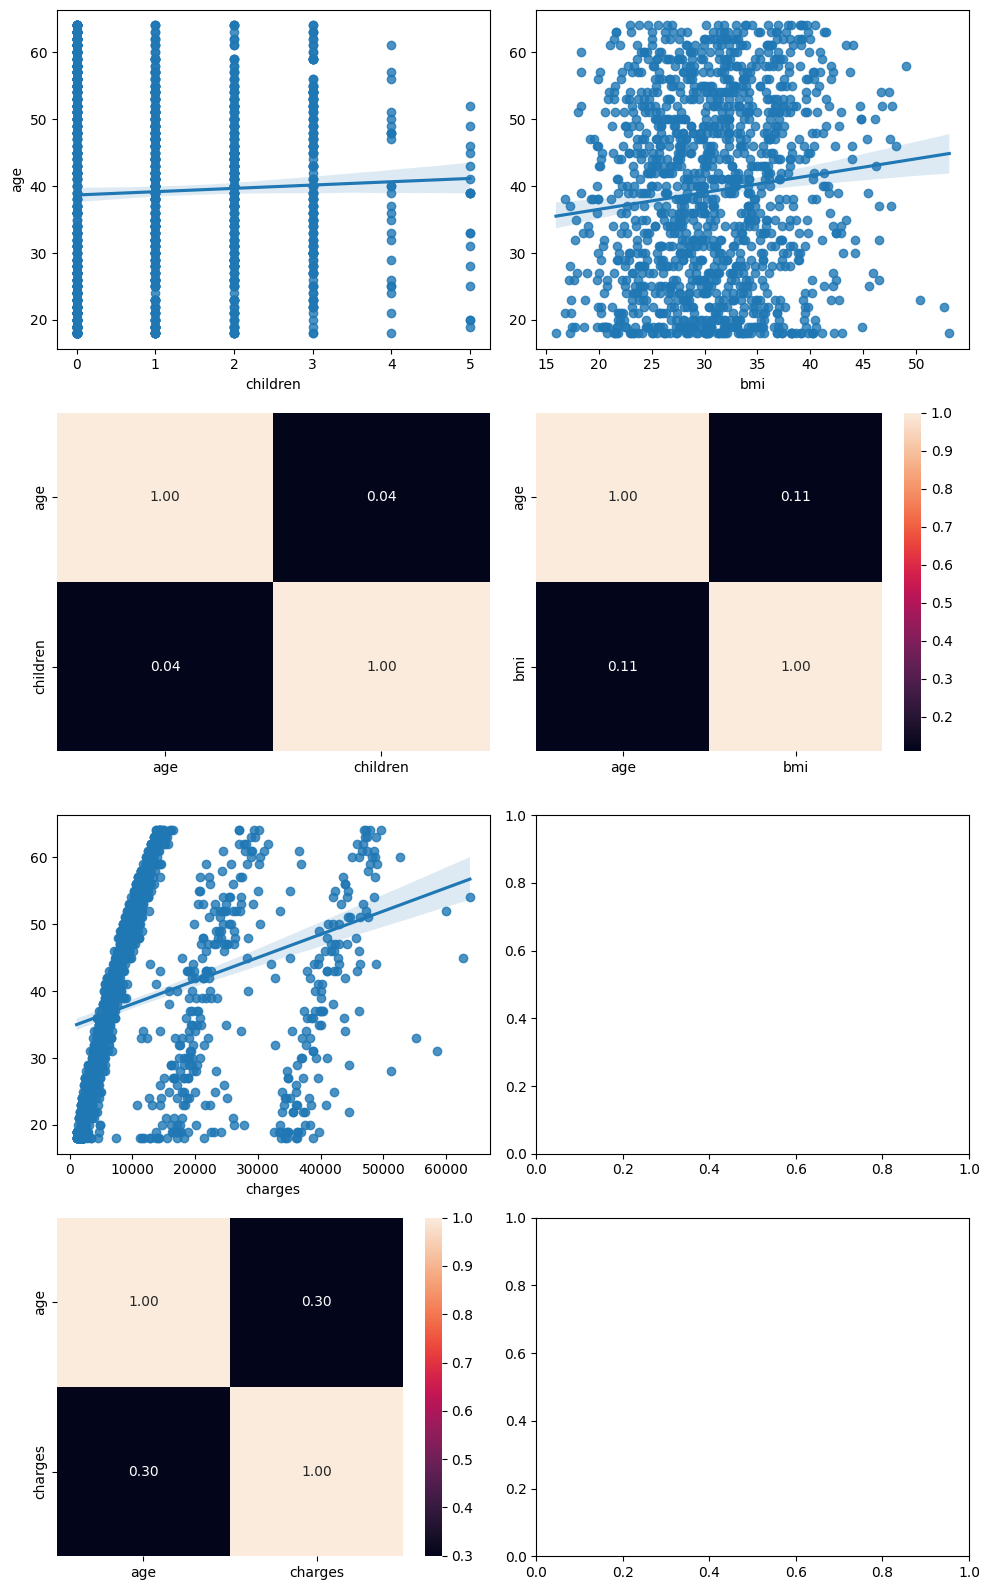

In [7]:
#Analisis multivariable numerico - numerico
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = data, x = "children", y = "age")
sns.heatmap(data[["age", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "bmi", y = "age").set(ylabel = None)
sns.heatmap(data[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data, x = "charges", y = "age").set(ylabel = None)
sns.heatmap(data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

plt.tight_layout()

plt.show()

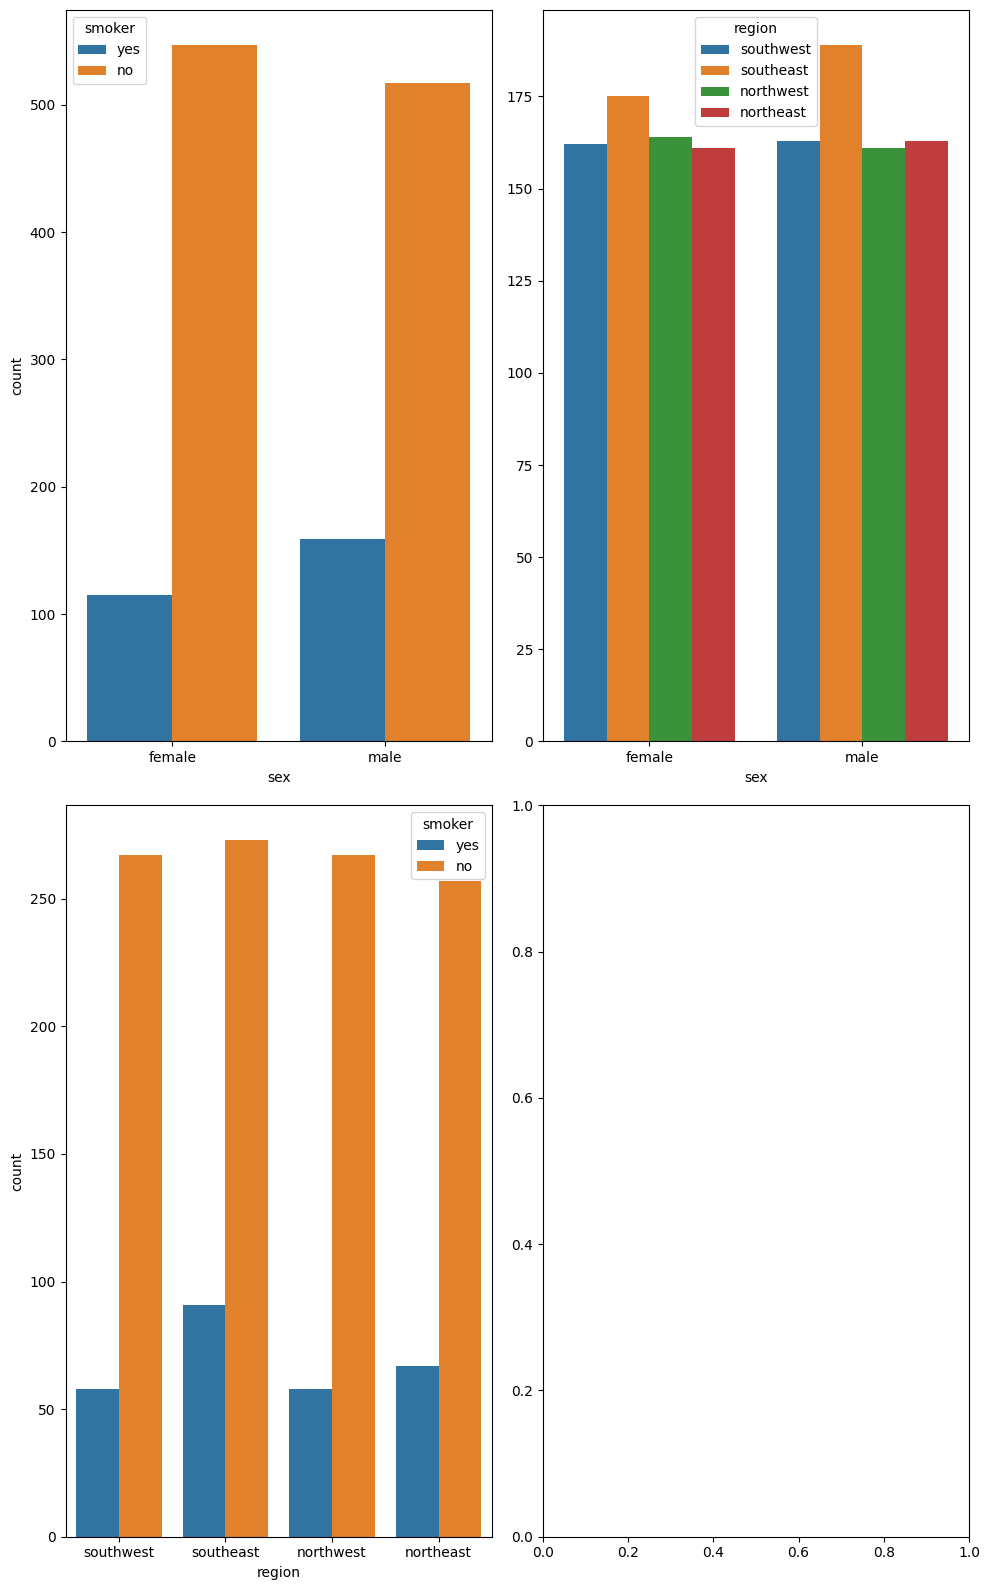

In [8]:
#Analisis multivariable categorico - categorico

fig, axis = plt.subplots(2, 2, figsize = (10, 16))

sns.countplot(ax = axis[0, 0], data = data, x = "sex", hue = "smoker")

sns.countplot(ax = axis[0, 1], data = data, x = "sex", hue = "region").set(ylabel = None)

sns.countplot(ax = axis[1, 0], data = data, x = "region", hue = "smoker")


plt.tight_layout()

plt.show()

In [9]:
#Analisis multivariable numerico - categorico

#Primero factorizamos las categoricas
from sklearn.preprocessing import MinMaxScaler

data["sex_n"] = pd.factorize(data["sex"])[0]
data["region_n"] = pd.factorize(data["region"])[0]
data["smoker_n"] = pd.factorize(data["smoker"])[0]

num_variables = ["sex_n", "region_n", "smoker_n", "age", "children", "bmi", "charges"]

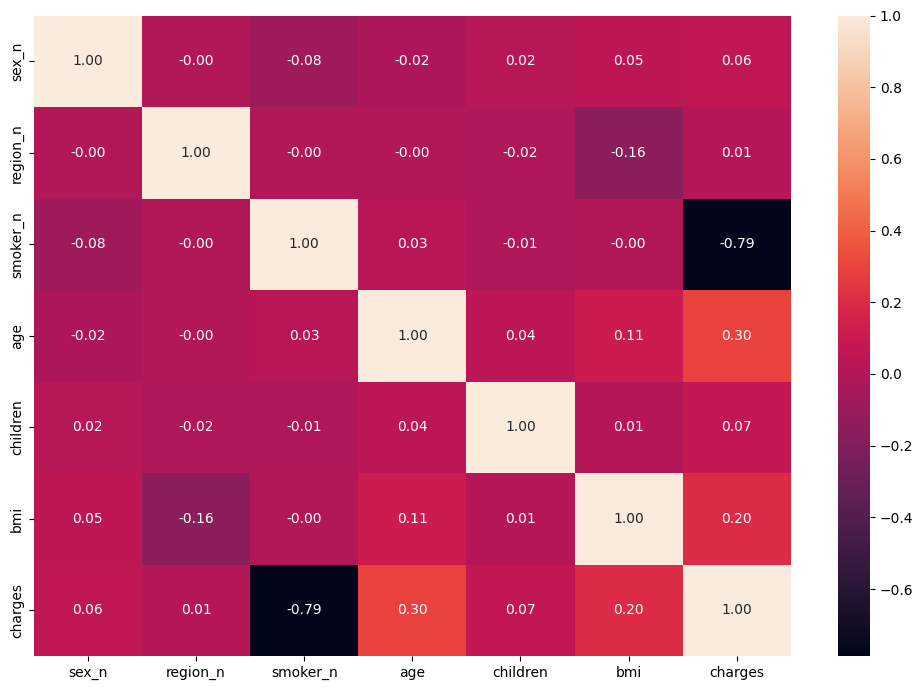

In [10]:
fig, axes = plt.subplots(figsize=(10, 7))

sns.heatmap(data[["sex_n", "region_n", "smoker_n", "age", "children", "bmi", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [11]:
data.describe()

,age,bmi,children,charges,sex_n,region_n,smoker_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,1.484305,0.795217
std,14.049960,6.098187,1.205493,12110.011237,0.500160,1.104885,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,2.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,3.000000,1.000000


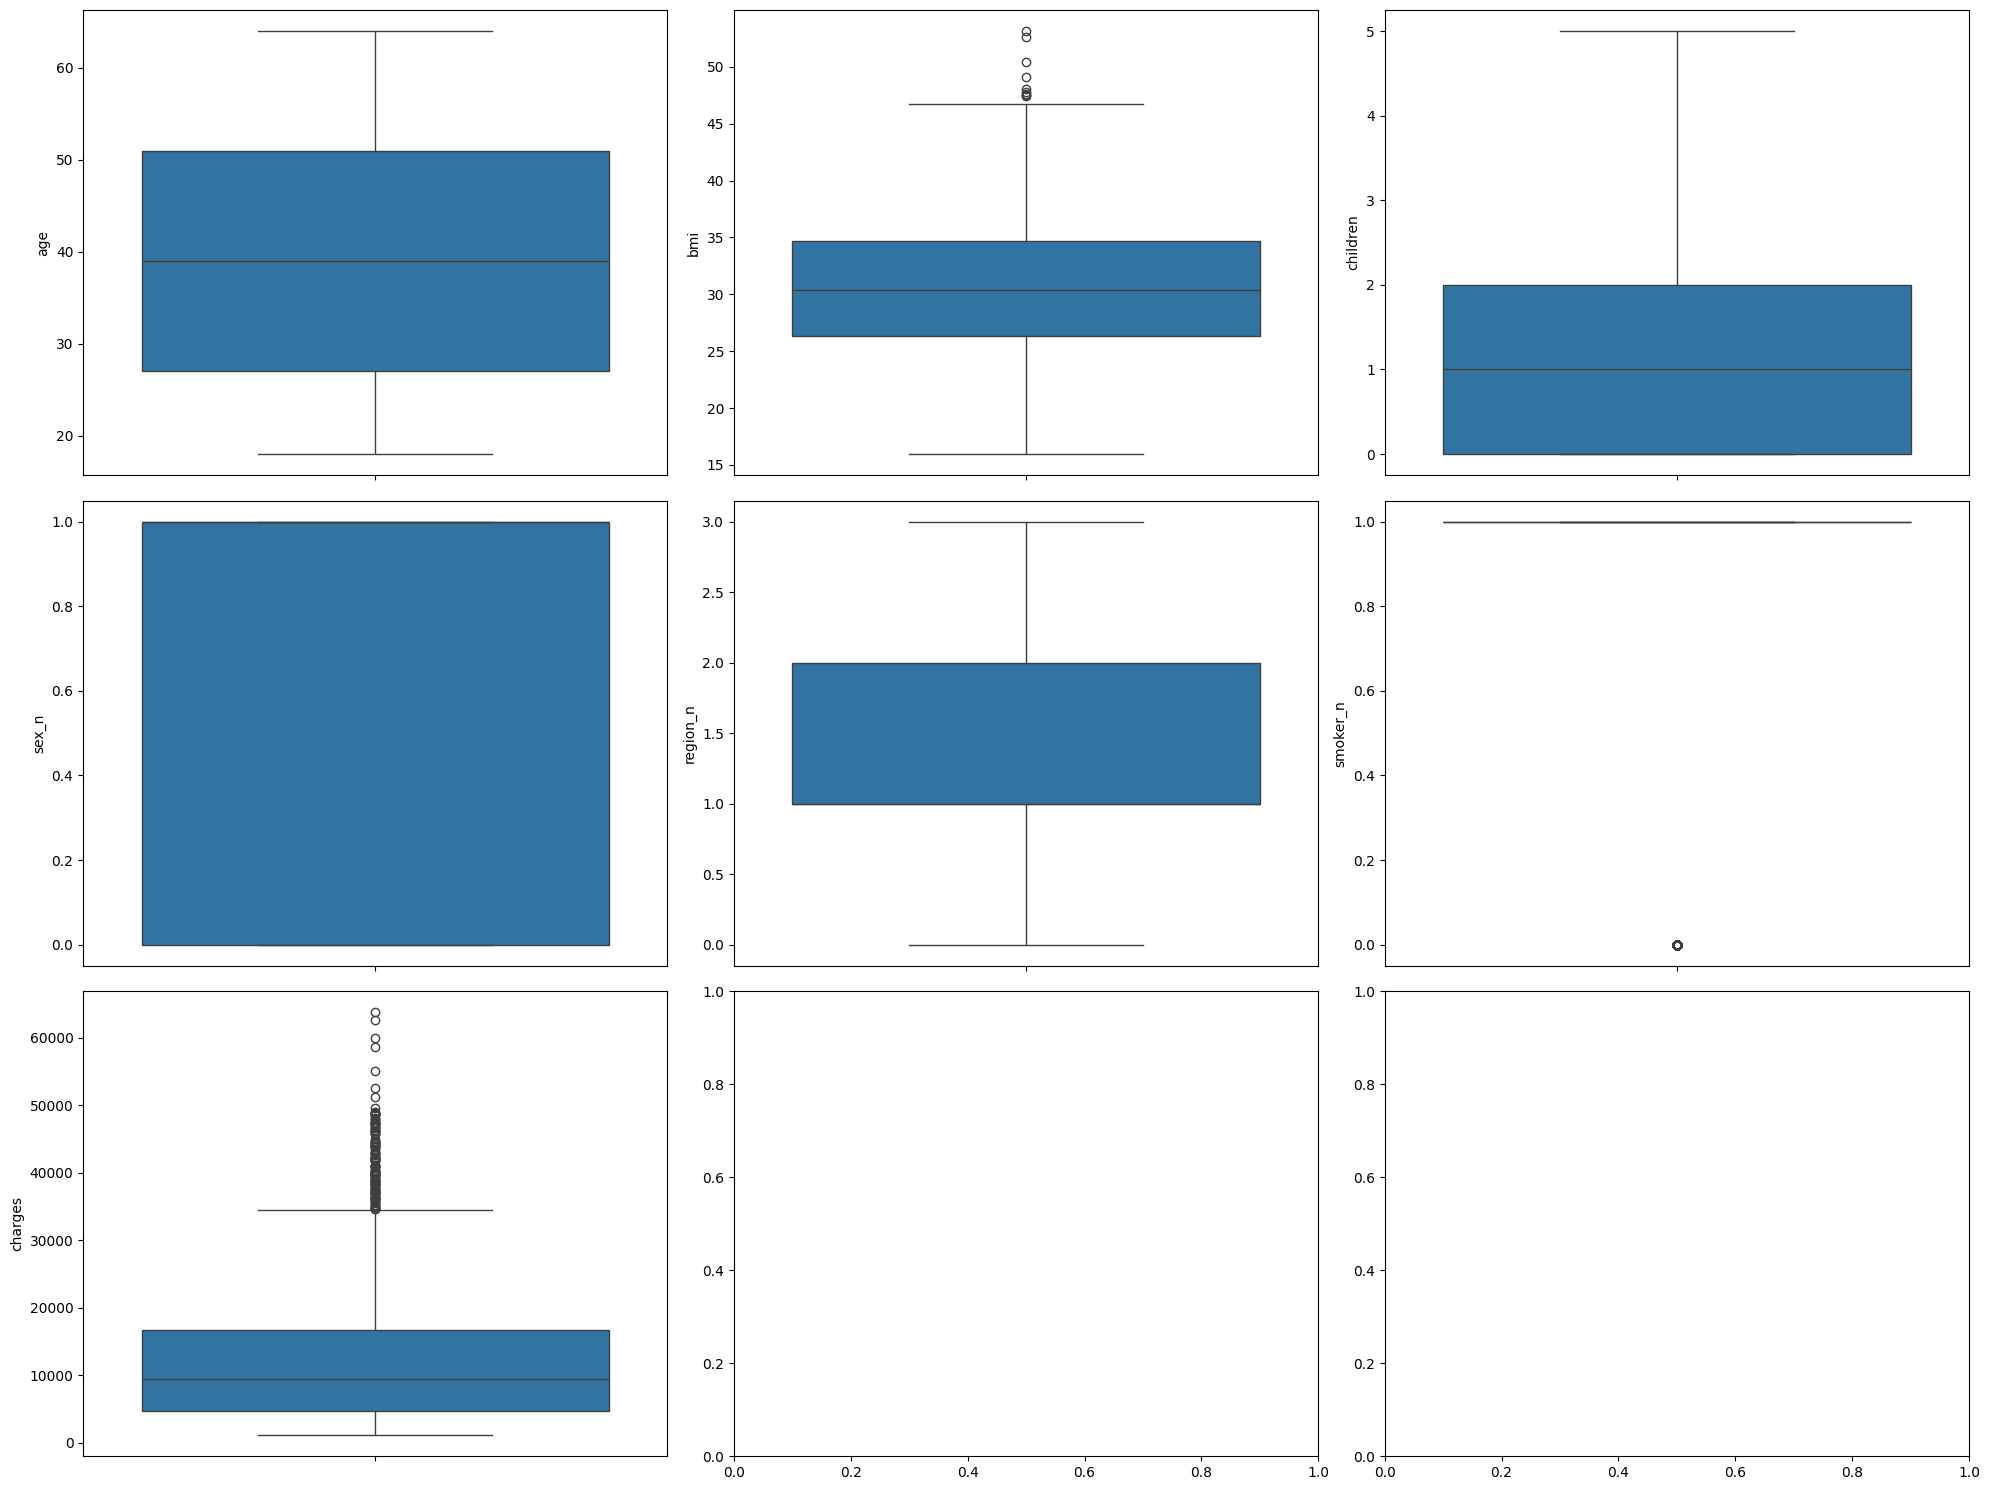

In [12]:

fig, axes = plt.subplots(3, 3, figsize = (20, 15))

sns.boxplot(ax = axes[0, 0], data = data, y = "age")
sns.boxplot(ax = axes[0, 1], data = data, y = "bmi")
sns.boxplot(ax = axes[0, 2], data = data, y = "children")
sns.boxplot(ax = axes[1, 0], data = data, y = "sex_n")
sns.boxplot(ax = axes[1, 1], data = data, y = "region_n")
sns.boxplot(ax = axes[1, 2], data = data, y = "smoker_n")
sns.boxplot(ax = axes[2, 0], data = data, y = "charges")


plt.tight_layout()

plt.show()

In [ ]:
data.isnull().sum().sort_values(ascending = False)

In [13]:
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])
data_scal = pd.DataFrame(scal_features, index = data.index, columns = num_variables)
data_scal.head()

,sex_n,region_n,smoker_n,age,children,bmi,charges
0,0.0,0.000000,0.0,0.021739,0.0,0.321227,0.251611
1,1.0,0.333333,1.0,0.000000,0.2,0.479150,0.009636
2,1.0,0.333333,1.0,0.217391,0.6,0.458434,0.053115
3,1.0,0.666667,1.0,0.326087,0.0,0.181464,0.333010
4,1.0,0.666667,1.0,0.304348,0.0,0.347592,0.043816


In [16]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = data_scal.drop("charges", axis = 1)
y = data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,smoker_n,age,children,bmi
0,1.0,0.608696,0.4,0.107345
1,1.0,0.630435,0.0,0.224913
2,1.0,0.739130,0.0,0.239440
3,1.0,0.456522,1.0,0.493947
4,1.0,0.782609,0.6,0.148238


In [42]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values

X_train_sel.to_csv("train_sel.csv", index = False)
X_test_sel.to_csv("test_sel.csv", index = False)

In [44]:
train_data = pd.read_csv("train_sel.csv")
test_data = pd.read_csv("train_sel.csv")

train_data.head()

,smoker_n,age,children,bmi,charges
0,1.0,0.608696,0.4,0.107345,0.128845
1,1.0,0.630435,0.0,0.224913,0.118324
2,1.0,0.739130,0.0,0.239440,0.414952
3,1.0,0.456522,1.0,0.493947,0.119316
4,1.0,0.782609,0.6,0.148238,0.181225


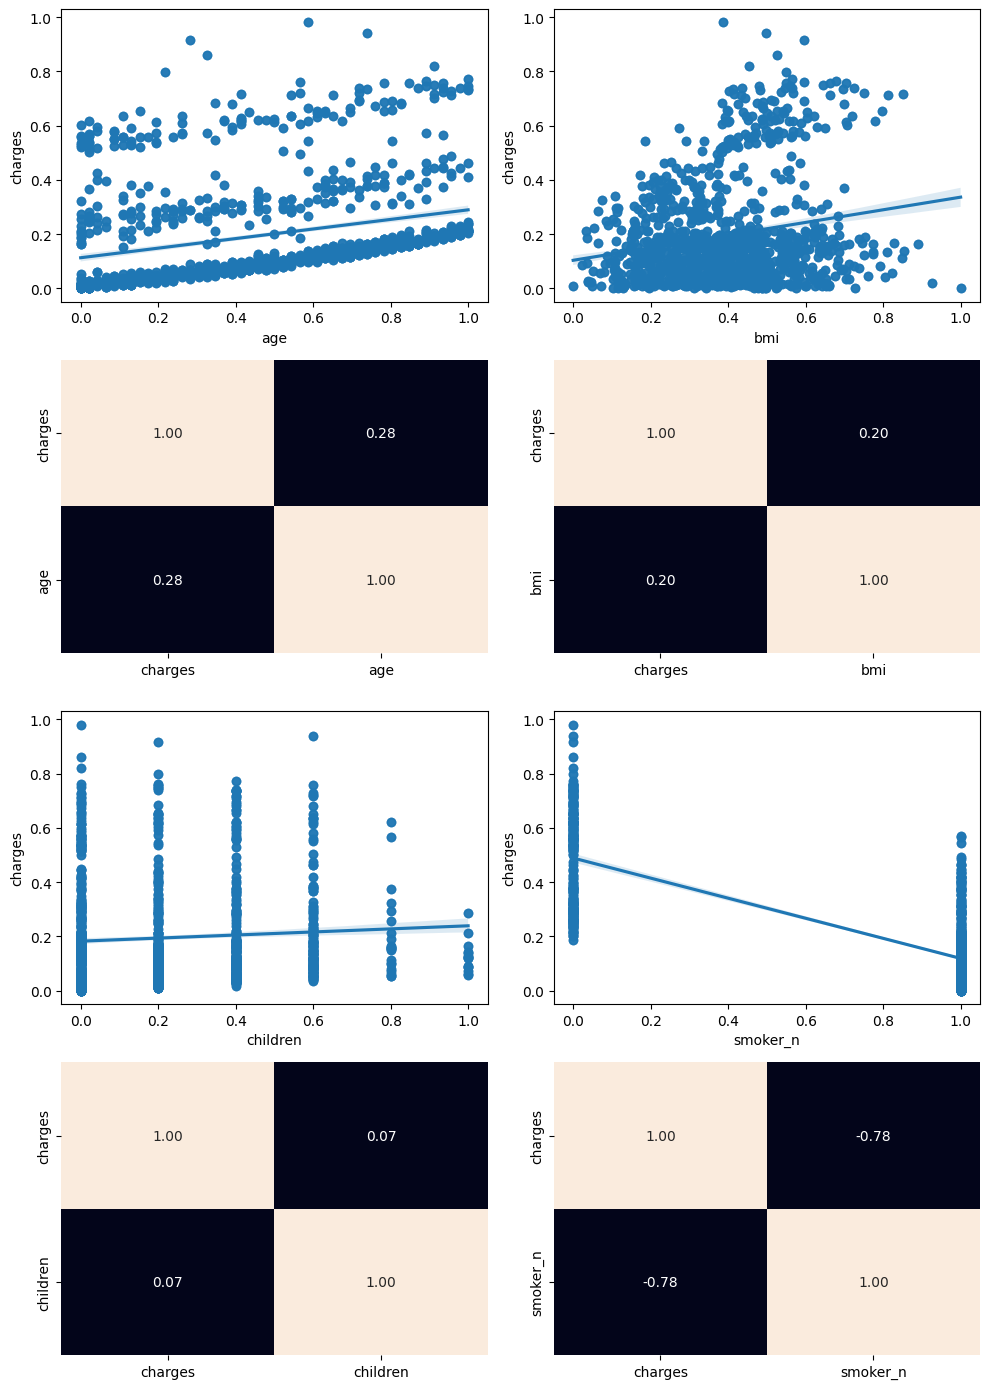

In [36]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14))
data = pd.concat([train_data, test_data])

sns.regplot(data = data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [ ]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 0.3152757546164623
Coeficientes (b1, b2): [-2.99950365e-04  1.29907675e-02 -3.77467899e-01  1.88744789e-01
  3.39266773e-02  1.99222443e-01]


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
y_pred

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.008569826799446187
R2 Score: 0.7833463107364539
